# <font color = orange>Lending Club Case study</font>

## <font color = blue>Index:</font>

- [Problem Statement](#0)
- [Step 1: Data Sourcing](#1)
    >[Dataset information analyis](#1.1)<br/>
- [Step 2: Data Cleaning](#2)
    >[Manual inspection and columns cleaning](#2.1)<br/>
    >[Rows Cleaning](#2.2)<br/>
    >[Treating missing values](#2.3)<br/>
    >[prepared clean data set without missing values](#2.4)<br/>
- [Step 3: Derived Columns](#3)
- [Step 4: Univariate Analysis](#4)
    >[Quantittative variables distribution](#4.1)<br/>
    >[Outliers detection and correction](#4.2)<br/>
    >[Categorical variables univariate analysis](#4.3)<br/>
    >[Inferences from categorical variables univariate analysis](#4.4)<br/>
- [Step-5: Bivariate Analysis](#5)
    >[Categorical variables Bivariate analysis](#5.1)<br/>
    >[Inferences from categorical variables bivariate analysis](#5.2)<br/>
    >[Quantitative variables Bivariate analysis](#5.3)<br/>
    >[Inferences from quantitative variables bivariate analysis](#5.4)<br/>
- [Conclusion](#6)

<a id="0"></a>
## <font color = blue>Problem Statement</font>
The data given contains information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

<a id="1"></a>
## <font color = blue>Step 1: Data Sourcing</font>
###### The data provided in this case study is private data. all the data is provided in one file loan.csv

In [239]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [240]:
# Reading the loan.csv file on which analysis needs to be done

df_loan = pd.read_csv("loan.csv",low_memory=False)

df_loan.head()


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


<a id="1.1"></a>
###### Dataset information analyis
> Both Id and member_id are unique columns
> Analysing dataset size and data types 

In [241]:
# analysing the sahpe of data and checking for unique column
print(df_loan.shape)
print(df_loan.id.nunique())
print(df_loan.member_id.nunique())

(39717, 111)
39717
39717


In [242]:
df_loan.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Dtype  
---   ------                          -----  
 0    id                              int64  
 1    member_id                       int64  
 2    loan_amnt                       int64  
 3    funded_amnt                     int64  
 4    funded_amnt_inv                 float64
 5    term                            object 
 6    int_rate                        object 
 7    installment                     float64
 8    grade                           object 
 9    sub_grade                       object 
 10   emp_title                       object 
 11   emp_length                      object 
 12   home_ownership                  object 
 13   annual_inc                      float64
 14   verification_status             object 
 15   issue_d                         object 
 16   loan_status                     object 
 17   pymnt_plan

<a id="2"></a>
## <font color = blue>Step2-Data Cleaning</font>

<a id="2.1"></a>
###### Manual inspection and columns cleaning -
- Below mentioned columns will be removed as they donot have valid data. 
- Some of these columns are customer behaviour columns for which we will not be having data at the time of loan application hence deleting them.
- 26 columns are left after cleaning

In [243]:
invalidColumns = ['member_id','pymnt_plan','url','desc','title','delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv',
'total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','collections_12_mths_ex_med',
'mths_since_last_major_derog','policy_code','application_type','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq','tot_coll_amt','tot_cur_bal','open_acc_6m','open_il_6m','open_il_12m',
'open_il_24m','mths_since_rcnt_il','total_bal_il','il_util','open_rv_12m','open_rv_24m','max_bal_bc','all_util','total_rev_hi_lim','inq_fi','total_cu_tl','inq_last_12m','acc_open_past_24mths','avg_cur_bal',
'bc_open_to_buy','bc_util','delinq_amnt','mo_sin_old_il_acct','mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl','mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq','mths_since_recent_inq',
'mths_since_recent_revol_delinq','num_accts_ever_120_pd','num_actv_bc_tl','num_actv_rev_tl','num_bc_sats','num_bc_tl','num_il_tl','num_op_rev_tl','num_rev_accts','num_rev_tl_bal_gt_0','num_sats',
'num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m','num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75','tot_hi_cred_lim','total_bal_ex_mort','total_bc_limit','total_il_high_credit_limit']

df_loan_cleaned = df_loan.drop(invalidColumns, axis=1)

In [244]:
df_loan_cleaned.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        39717 non-null  int64  
 1   loan_amnt                 39717 non-null  int64  
 2   funded_amnt               39717 non-null  int64  
 3   funded_amnt_inv           39717 non-null  float64
 4   term                      39717 non-null  object 
 5   int_rate                  39717 non-null  object 
 6   installment               39717 non-null  float64
 7   grade                     39717 non-null  object 
 8   sub_grade                 39717 non-null  object 
 9   emp_title                 37258 non-null  object 
 10  emp_length                38642 non-null  object 
 11  home_ownership            39717 non-null  object 
 12  annual_inc                39717 non-null  float64
 13  verification_status       39717 non-null  object 
 14  issue_

<a id="2.2"></a>
###### Rows Cleaning -
- Removing the rows with loan status current as they will not be usefull for loan default analysis

In [245]:
df_loan_cleaned.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [246]:
#Remove row with loan status as current
df_loan_cleaned = df_loan_cleaned[df_loan_cleaned.loan_status != 'Current']


<a id="2.3"></a>
###### Treating missing values -
- Checking the percentage of missing values for each column
- Removing the columns having high percentage of missing values
- imputing missing values for columns with less percentage of missing values

In [247]:
# Calculating the Missing Values % contribution in DF
df_null = df_loan_cleaned.isnull().mean().round(4) * 100
df_null.sort_values(ascending=False).head(15)

next_pymnt_d                100.00
mths_since_last_record       92.90
mths_since_last_delinq       64.56
emp_title                     6.19
emp_length                    2.68
pub_rec_bankruptcies          1.81
chargeoff_within_12_mths      0.15
tax_liens                     0.10
loan_status                   0.00
initial_list_status           0.00
dti                           0.00
addr_state                    0.00
zip_code                      0.00
purpose                       0.00
id                            0.00
dtype: float64

In [248]:
#checking for duplicates, no duplicate records found
df_loan_cleaned[df_loan_cleaned.duplicated()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,zip_code,addr_state,dti,mths_since_last_delinq,mths_since_last_record,initial_list_status,next_pymnt_d,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens


In [249]:
#removing next_pymnt_d,mths_since_last_record and mths_since_last_delinq as most of the values are null
df_loan_cleaned.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'], axis=1,inplace=True)
df_null = df_loan_cleaned.isnull().mean().round(4) * 100
df_null.sort_values(ascending=False).head(15)

emp_title                   6.19
emp_length                  2.68
pub_rec_bankruptcies        1.81
chargeoff_within_12_mths    0.15
tax_liens                   0.10
verification_status         0.00
initial_list_status         0.00
dti                         0.00
addr_state                  0.00
zip_code                    0.00
purpose                     0.00
loan_status                 0.00
issue_d                     0.00
id                          0.00
loan_amnt                   0.00
dtype: float64

In [250]:
#imputing null values as "not Available" for emp_title feature as this is categorical.
df_loan_cleaned["emp_title"].fillna("Not Available", inplace = True)
df_loan_cleaned[df_loan_cleaned.emp_title.isnull()]

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,...,issue_d,loan_status,purpose,zip_code,addr_state,dti,initial_list_status,chargeoff_within_12_mths,pub_rec_bankruptcies,tax_liens


In [251]:
df_null = df_loan_cleaned.isnull().mean().round(4) * 100
df_null.sort_values(ascending=False).head(15)

emp_length                  2.68
pub_rec_bankruptcies        1.81
chargeoff_within_12_mths    0.15
tax_liens                   0.10
verification_status         0.00
initial_list_status         0.00
dti                         0.00
addr_state                  0.00
zip_code                    0.00
purpose                     0.00
loan_status                 0.00
issue_d                     0.00
id                          0.00
loan_amnt                   0.00
home_ownership              0.00
dtype: float64

In [252]:
df_loan_cleaned.pub_rec_bankruptcies.value_counts()

0.0    36238
1.0     1637
2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [253]:
#imputing null values for pub_rec_bankruptcies with -1 as the data type is float64
df_loan_cleaned["pub_rec_bankruptcies"].fillna(-1, inplace = True)
df_loan_cleaned.pub_rec_bankruptcies.value_counts()

 0.0    36238
 1.0     1637
-1.0      697
 2.0        5
Name: pub_rec_bankruptcies, dtype: int64

In [254]:
#imputing null values as "not Available" for emp_length feature as this is categorical
df_loan_cleaned["emp_length"].fillna("Not Available", inplace = True)
df_loan_cleaned.emp_length.value_counts()

10+ years        8488
< 1 year         4508
2 years          4291
3 years          4012
4 years          3342
5 years          3194
1 year           3169
6 years          2168
7 years          1711
8 years          1435
9 years          1226
Not Available    1033
Name: emp_length, dtype: int64

In [255]:
df_loan_cleaned.chargeoff_within_12_mths.value_counts()

0.0    38521
Name: chargeoff_within_12_mths, dtype: int64

In [256]:
#deleteing the column chargeoff_within_12_mths because it has only one value 0.0
df_loan_cleaned.drop('chargeoff_within_12_mths', axis=1,inplace=True)

In [257]:
df_loan_cleaned.tax_liens.value_counts()

0.0    38538
Name: tax_liens, dtype: int64

In [258]:
#deleteing the column tax_liens because it has only one value 0.0
df_loan_cleaned.drop('tax_liens', axis=1,inplace=True)

<a id="2.4"></a>
###### Prepared clean data set without missing values

In [259]:
df_loan_cleaned.isnull().sum()

id                      0
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
zip_code                0
addr_state              0
dti                     0
initial_list_status     0
pub_rec_bankruptcies    0
dtype: int64

<a id="3"></a>
## <font color = blue>Step3-Derived columns</font>
- Derived 2 new columns issue_month and issue_year from column issue_d

In [260]:
df_loan_cleaned[['issue_month','issue_year']] = df_loan_cleaned['issue_d'].str.split('-',expand=True)


In [261]:
df_loan_cleaned.issue_month.value_counts()

Dec    4215
Nov    4006
Oct    3761
Sep    3498
Aug    3388
Jul    3351
Jun    3180
May    2919
Apr    2831
Mar    2691
Jan    2379
Feb    2358
Name: issue_month, dtype: int64

In [262]:
#converting 2 digit year to 4 digit year by appending 20
df_loan_cleaned.issue_year = df_loan_cleaned.issue_year.apply(lambda x: '20'+x)


<a id="4"></a>
## <font color = blue>Step-4 Univariate Analysis</font>
- Splitting the columns into categorical and quantitative columns
- This splitting is done based on manual inspection and the number of unique values present in each column

In [263]:
#Checking unique values to identify categorical and continous columns
df_loan_cleaned.nunique()

id                      38577
loan_amnt                 870
funded_amnt              1019
funded_amnt_inv          8050
term                        2
int_rate                  370
installment             15022
grade                       7
sub_grade                  35
emp_title               28028
emp_length                 12
home_ownership              5
annual_inc               5215
verification_status         3
issue_d                    55
loan_status                 2
purpose                    14
zip_code                  822
addr_state                 50
dti                      2853
initial_list_status         1
pub_rec_bankruptcies        4
issue_month                12
issue_year                  5
dtype: int64

In [264]:
cols_categorical=['term','grade','sub_grade','emp_length','home_ownership','verification_status','loan_status','purpose',
                  'addr_state','initial_list_status','pub_rec_bankruptcies','issue_month','issue_year']
cols_quantitative=['loan_amnt','funded_amnt','funded_amnt_inv','int_rate','installment','annual_inc','dti',]
cols_continuous_nonNumeric = ['emp_title','issue_d','zip_code']

In [265]:
#dropping continuous non numeric columns are these are not usefull for insights
df_loan_cleaned = df_loan_cleaned.drop(cols_continuous_nonNumeric, axis=1)

In [266]:
df_loan_cleaned[cols_quantitative].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        38577 non-null  int64  
 1   funded_amnt      38577 non-null  int64  
 2   funded_amnt_inv  38577 non-null  float64
 3   int_rate         38577 non-null  object 
 4   installment      38577 non-null  float64
 5   annual_inc       38577 non-null  float64
 6   dti              38577 non-null  float64
dtypes: float64(4), int64(2), object(1)
memory usage: 2.4+ MB


In [267]:
#converting interest rate to float

df_loan_cleaned.int_rate = df_loan_cleaned.int_rate.apply(lambda x: float(x.replace('%','')))

<a id="4.1"></a>
###### Quantitative variables univariate analysis
- Plotted Histograms for understanding distribution of Quantitative variables
- All the distributions look fine except annual_inc

Data Distribution


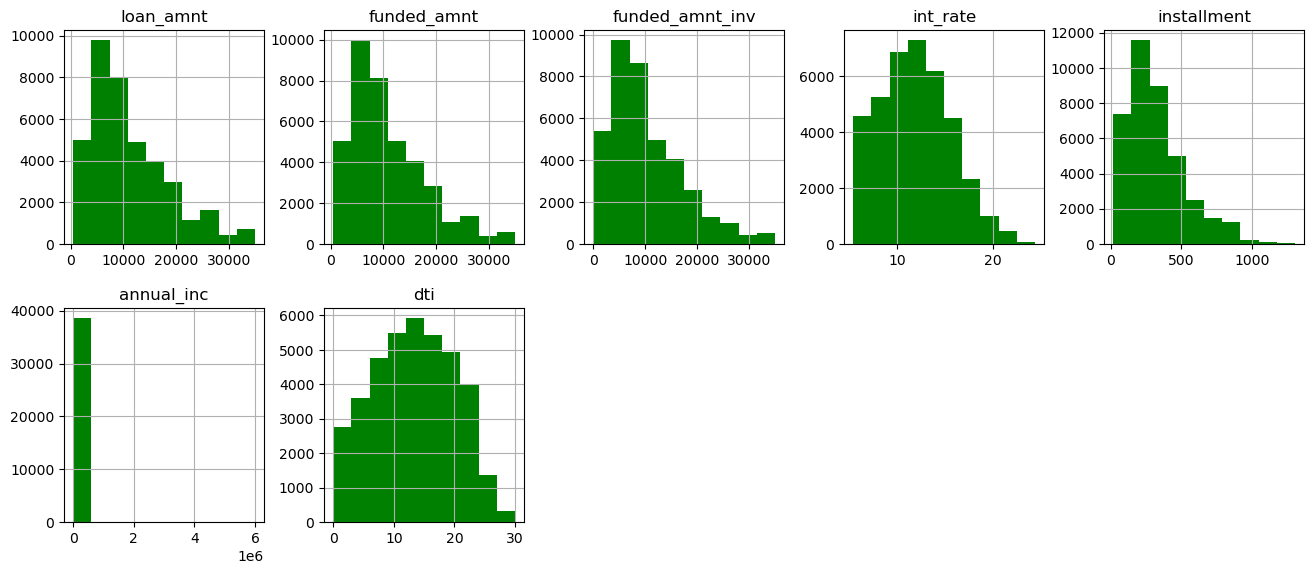

In [268]:
df_loan_cleaned[cols_quantitative].hist(layout = (3,5), figsize=(16,10), color = 'g')
print('Data Distribution')

<a id="4.2"></a>
###### Outliers detection and correction
- as the histogram of Annual_inc is not distributed properly there might be chances of outliers
- used box plot to understand the outliers of annual_inc
- Created function to check outliers for all the columns
- while treating outliers considered 5th percentile as Q1 and 95th percentile as Q2 as this is financial data
- verified if there are any outliers in other columns using the function.

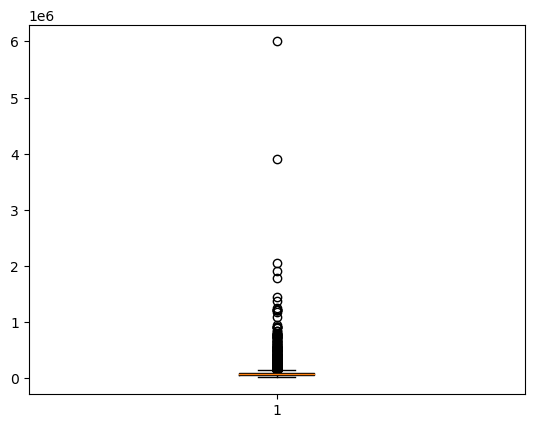

In [269]:
#by the above plot we can incur that annual_inc has outliers. below we can verify the same with box plot
plt.boxplot(df_loan_cleaned.annual_inc)
plt.show()

In [270]:
#functiona for handling outliers
#Here we have considered 5th percentile as Q1 and 95th percentile as Q2 as this is financial data.

def outlier_thresholds(dataframe, col_name, q1=0.05, q3=0.95):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [271]:
#Detecting the outliers
outliers = []
# Outlier detection for continuous variables
for col in cols_quantitative:
    print(f"{col} :  {check_outlier(df_loan_cleaned, col)}")
    outliers.append(check_outlier(df_loan_cleaned, col))
    
print(f"Outliers detected? {np.array(outliers).any()}")

loan_amnt :  False
funded_amnt :  False
funded_amnt_inv :  False
int_rate :  False
installment :  False
annual_inc :  True
dti :  False
Outliers detected? True


In [272]:
df_loan_cleaned.shape

(38577, 21)

In [273]:
replace_with_thresholds(df_loan_cleaned,"annual_inc")

<Axes: ylabel='annual_inc'>

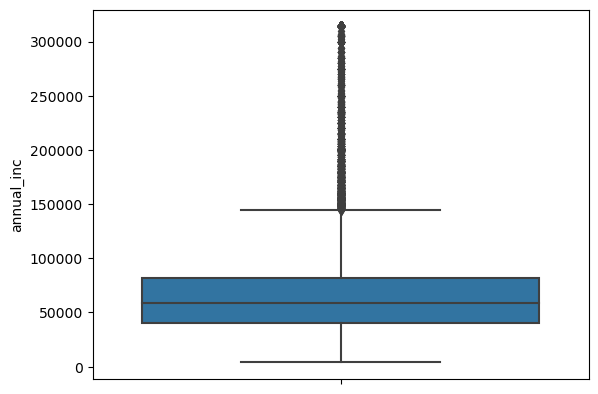

In [274]:
sns.boxplot(y="annual_inc",
            data=df_loan_cleaned)

Data Distribution


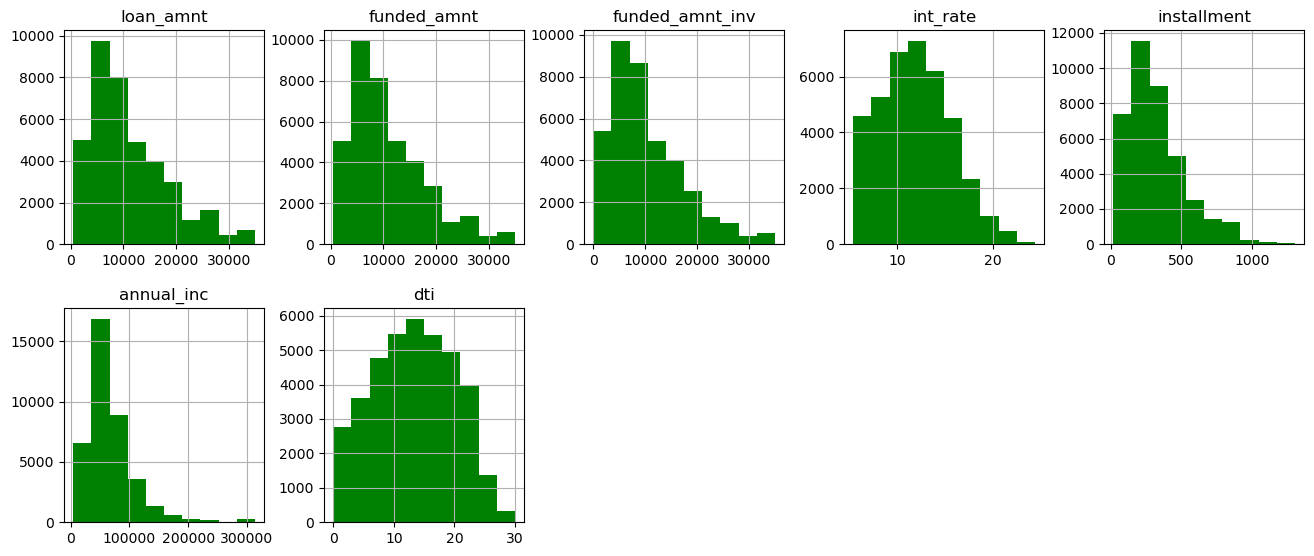

In [275]:
df_loan_cleaned[cols_quantitative].hist(layout = (3,5), figsize=(16,10), color = 'g')
print('Data Distribution')

<a id="4.3"></a>
### Categorical variables univariate analysis
- Plotted bar graph for all the categorical variables to understand idstribution of data with respect to categorical variables.

In [276]:
print(cols_categorical)
df_loan_cleaned.info()

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'initial_list_status', 'pub_rec_bankruptcies', 'issue_month', 'issue_year']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38577 non-null  int64  
 1   loan_amnt             38577 non-null  int64  
 2   funded_amnt           38577 non-null  int64  
 3   funded_amnt_inv       38577 non-null  float64
 4   term                  38577 non-null  object 
 5   int_rate              38577 non-null  float64
 6   installment           38577 non-null  float64
 7   grade                 38577 non-null  object 
 8   sub_grade             38577 non-null  object 
 9   emp_length            38577 non-null  object 
 10  home_ownership        38577 non-null  object 
 11  annual_inc           

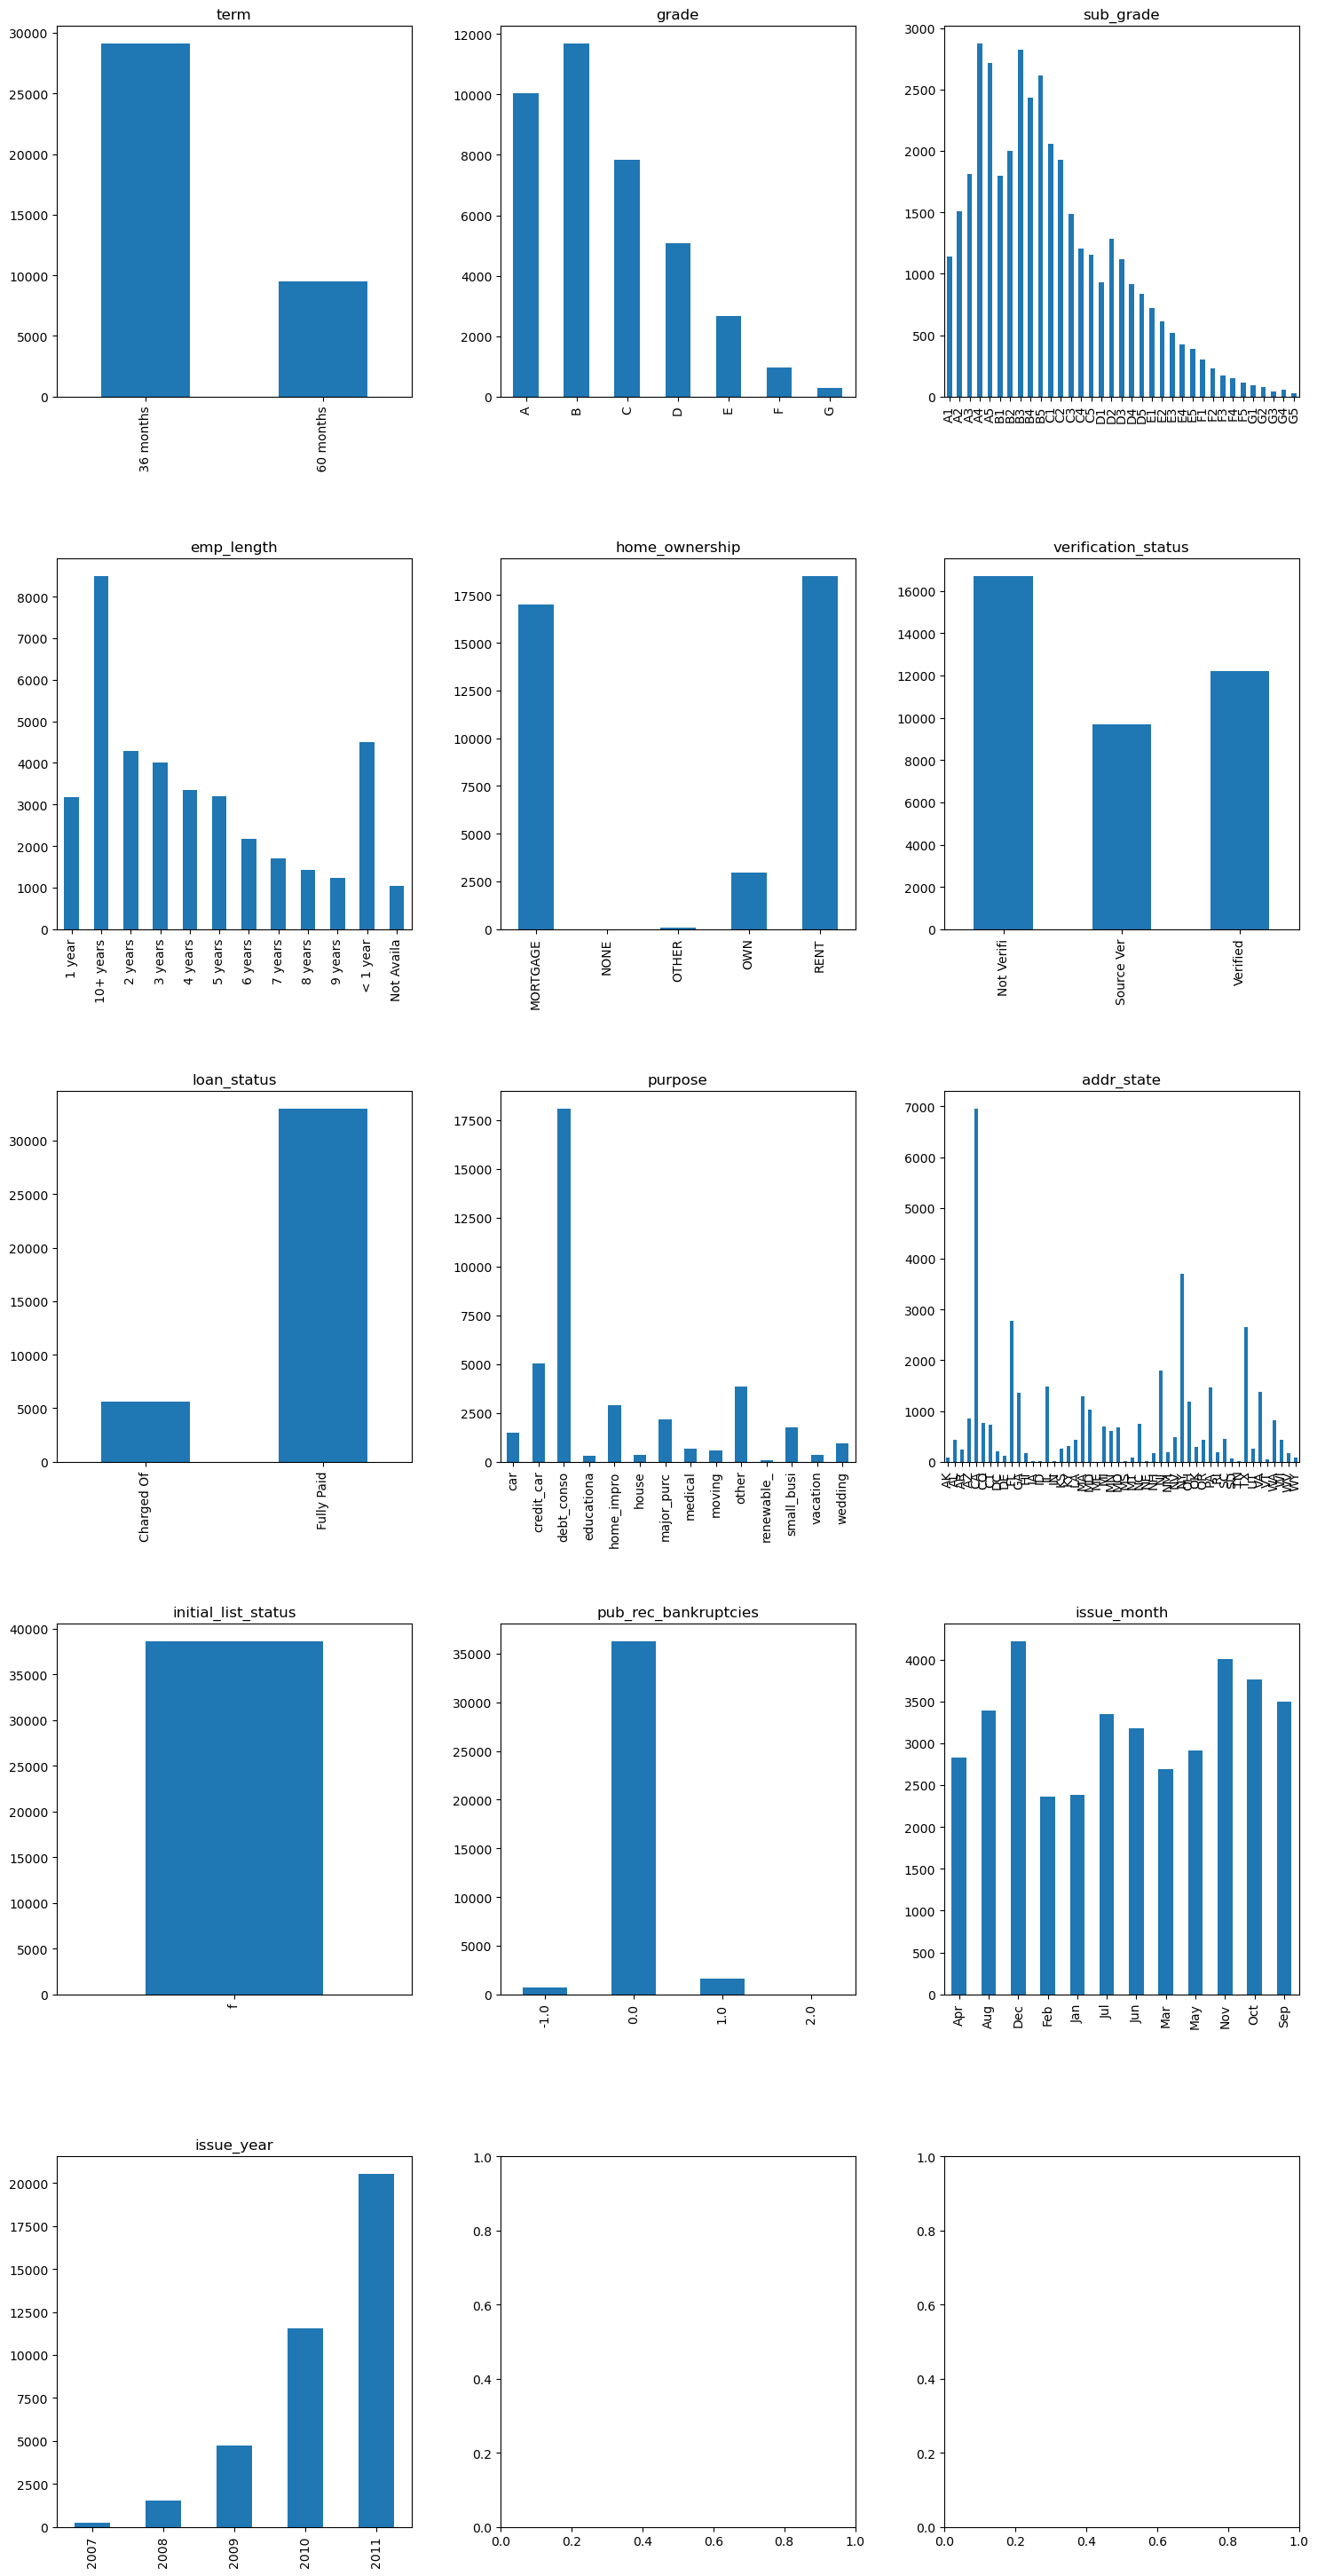

In [277]:
categorical_features = cols_categorical
subplot_rows=round(len(categorical_features)/3)+1
subplot_cols=3
i=0
j=0
fig, ax = plt.subplots(subplot_rows, subplot_cols)
fig.tight_layout(pad=0)
for categorical_feature in categorical_features:
    df_valueCounts=df_loan_cleaned[categorical_feature].value_counts().sort_index()
    df_valueCounts.plot(kind='bar', ax=ax[i,j], figsize=(15,30))
    ax[i,j].set_xticklabels(item.get_text()[:10] for item in ax[i,j].get_xticklabels())
    ax[i,j].title.set_text(categorical_feature)
    if j<subplot_cols-1:
        j=j+1
    else:
        if i<subplot_rows-1:
            i=i+1        
        j=0
fig.show()

<a id="4.4"></a>
### Inferences from categorical variables univariate analysis
1. Initial_list_status feature can be ignored as it has only one value
1. The number of loans gradually increases year by year.
1. More loans are issued at the year end in the month of december. It might be because of festival season.
1. Most of the borrowers houses are uner mortgage or they are renting the house.

<a id="5"></a>
## <font color = blue>Step-5 Bivariate Analysis</font>
- Bivariate analysis is used to find the relation between 2 features of the dataset
<a id="5.1"></a>
### Categorical variables Bivariate analysis
- Bivariate analysis of categorical variables is performed against the target loan status with stacked bar charts.

In [278]:
print(cols_categorical)
df_loan_cleaned.loan_status.value_counts()

['term', 'grade', 'sub_grade', 'emp_length', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 'initial_list_status', 'pub_rec_bankruptcies', 'issue_month', 'issue_year']


Fully Paid     32950
Charged Off     5627
Name: loan_status, dtype: int64

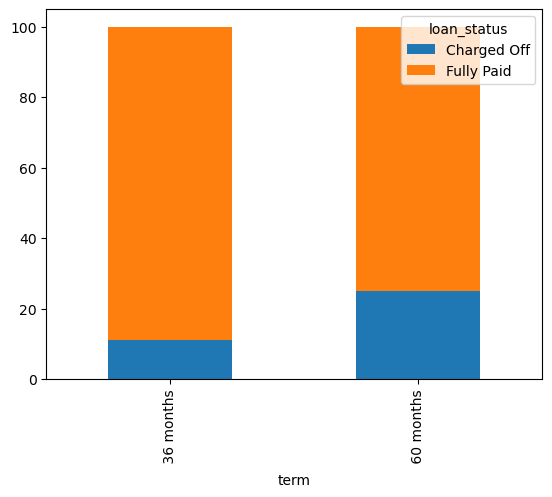

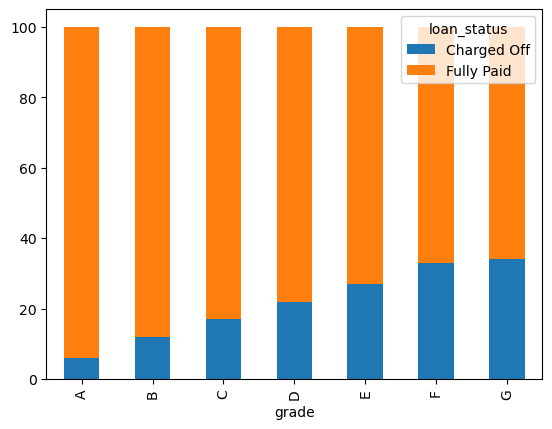

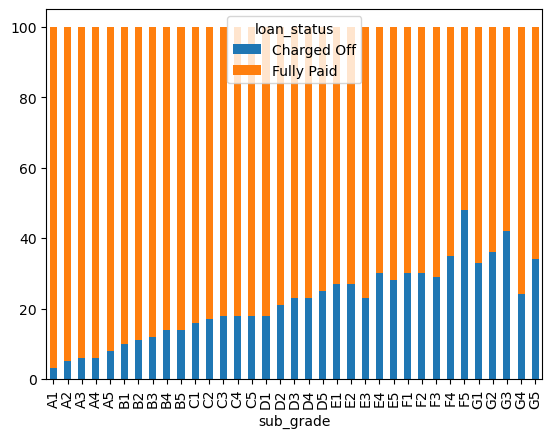

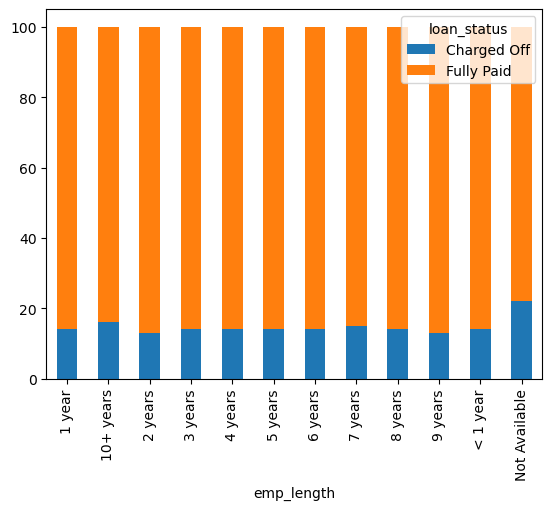

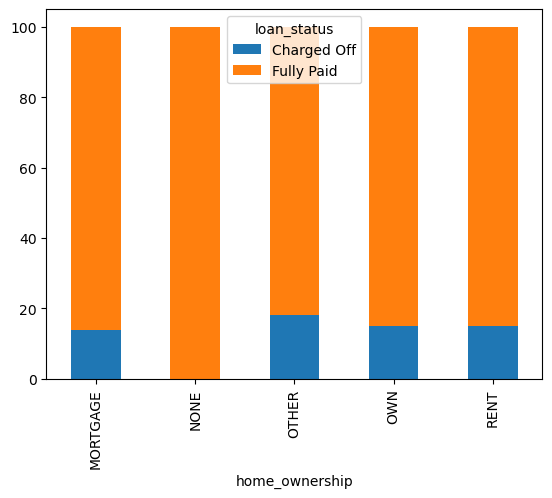

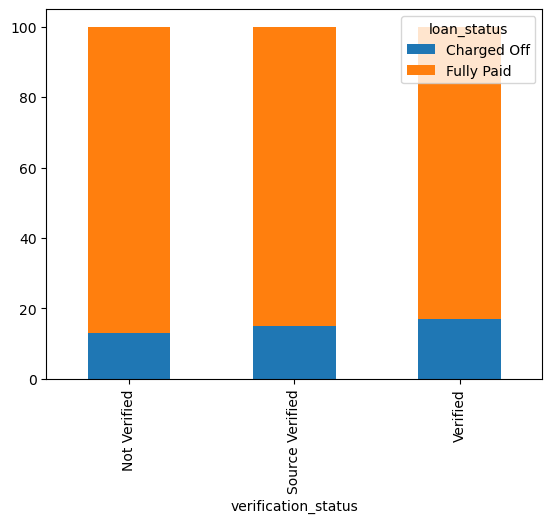

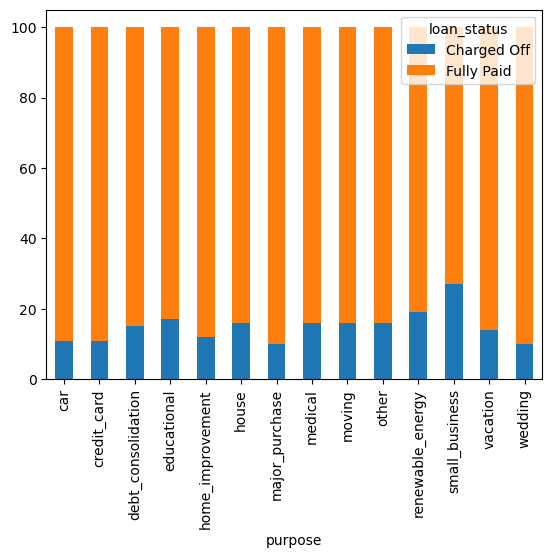

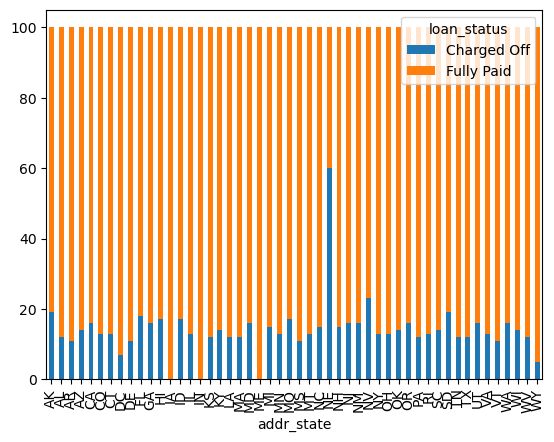

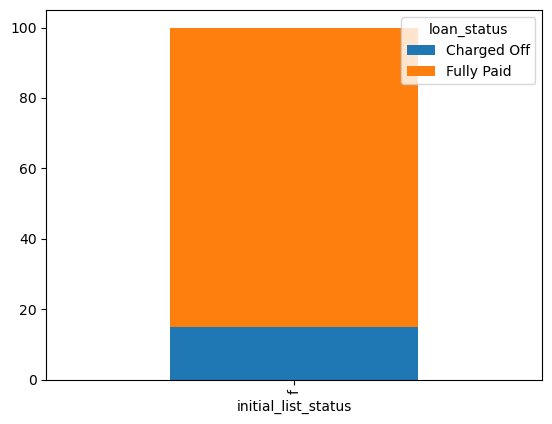

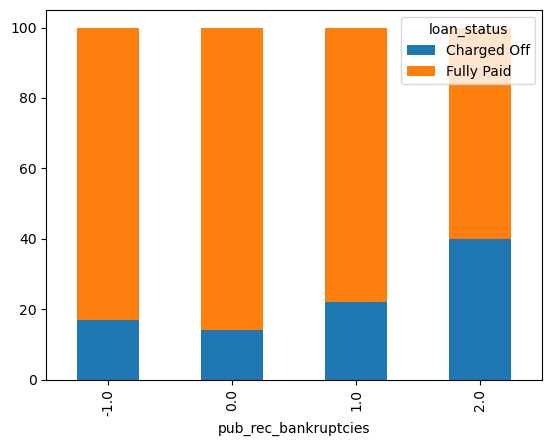

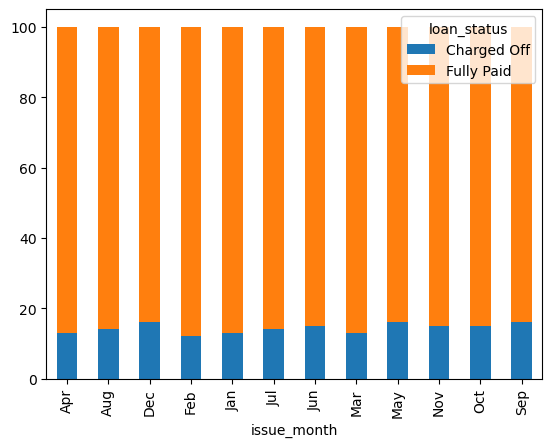

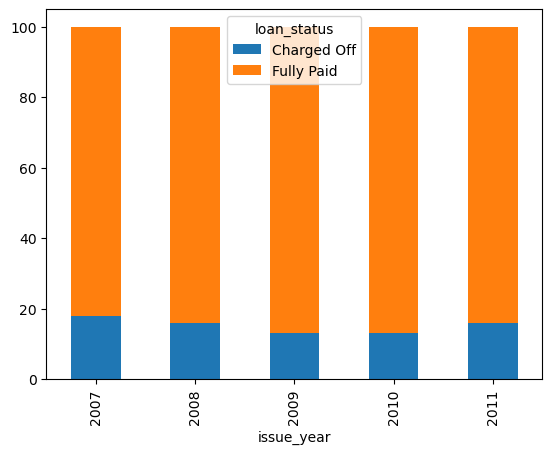

In [279]:
for x in ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose',
                  'addr_state','initial_list_status','pub_rec_bankruptcies','issue_month','issue_year']:    
    pivot = df_loan_cleaned.pivot_table(index=x, columns='loan_status',values='id',aggfunc='count' )
    pivot = pivot.fillna(0)
    pivot['total'] = pivot['Charged Off'] + pivot['Fully Paid']
    pivot_percent = pivot.div(pivot['total'], axis=0).mul(100).round(0).astype(int)
    pivot_percent.drop('total',axis=1,inplace=True)
    pivot_percent.plot(kind='bar',stacked=True)

<a id="5.2"></a>
### Inferences from categorical variables bivariate analysis
1. Term - 60 Month term loans have higher percentage of defaulters
1. Grade - The percentage of defaulters increases gradually as the grade changes from A to G 
1. Sub_grade - sub grade F5 has highest number of Defaulters between 45 to 50 %
1. Emp_length - There is no impact of emp length on default percentages.
1. Home_ownership - there is no specific trend of defaulters based on home ownership
1. Verification_status - surprisingly verified customer have slightly more percentage of defaulters than non verified
1. Purpose - Loans taken for small business have high default rate
1. <font color=red>State - The state NE(Nebraska) has very high number of defaulters, also in this state defaulters are more than fully paid borrowers</font> 
1. Pub_rec_bankrupcies - higher the number of bankrupcies higher the chances of defaulting the loan
1. Issue_month - no specific trend of defaulters percentage acroos the months
1. Issue_year - no specific trend of defaulters percentage acroos the years

<a id="5.3"></a>
## Quantitative variables Bivariate analysis
- For this analysis we will consider the data with loan_status Charged Off only 
- With this data we can check how the defaulted loans are spread with respect to quantitative variables.

In [280]:
#Extracting defaulted loans from the cleaned dataset
df_loan_cleaned_defaulted = df_loan_cleaned[df_loan_cleaned['loan_status']=='Charged Off']
df_loan_cleaned_defaulted.drop('loan_status',axis=1,inplace=True)

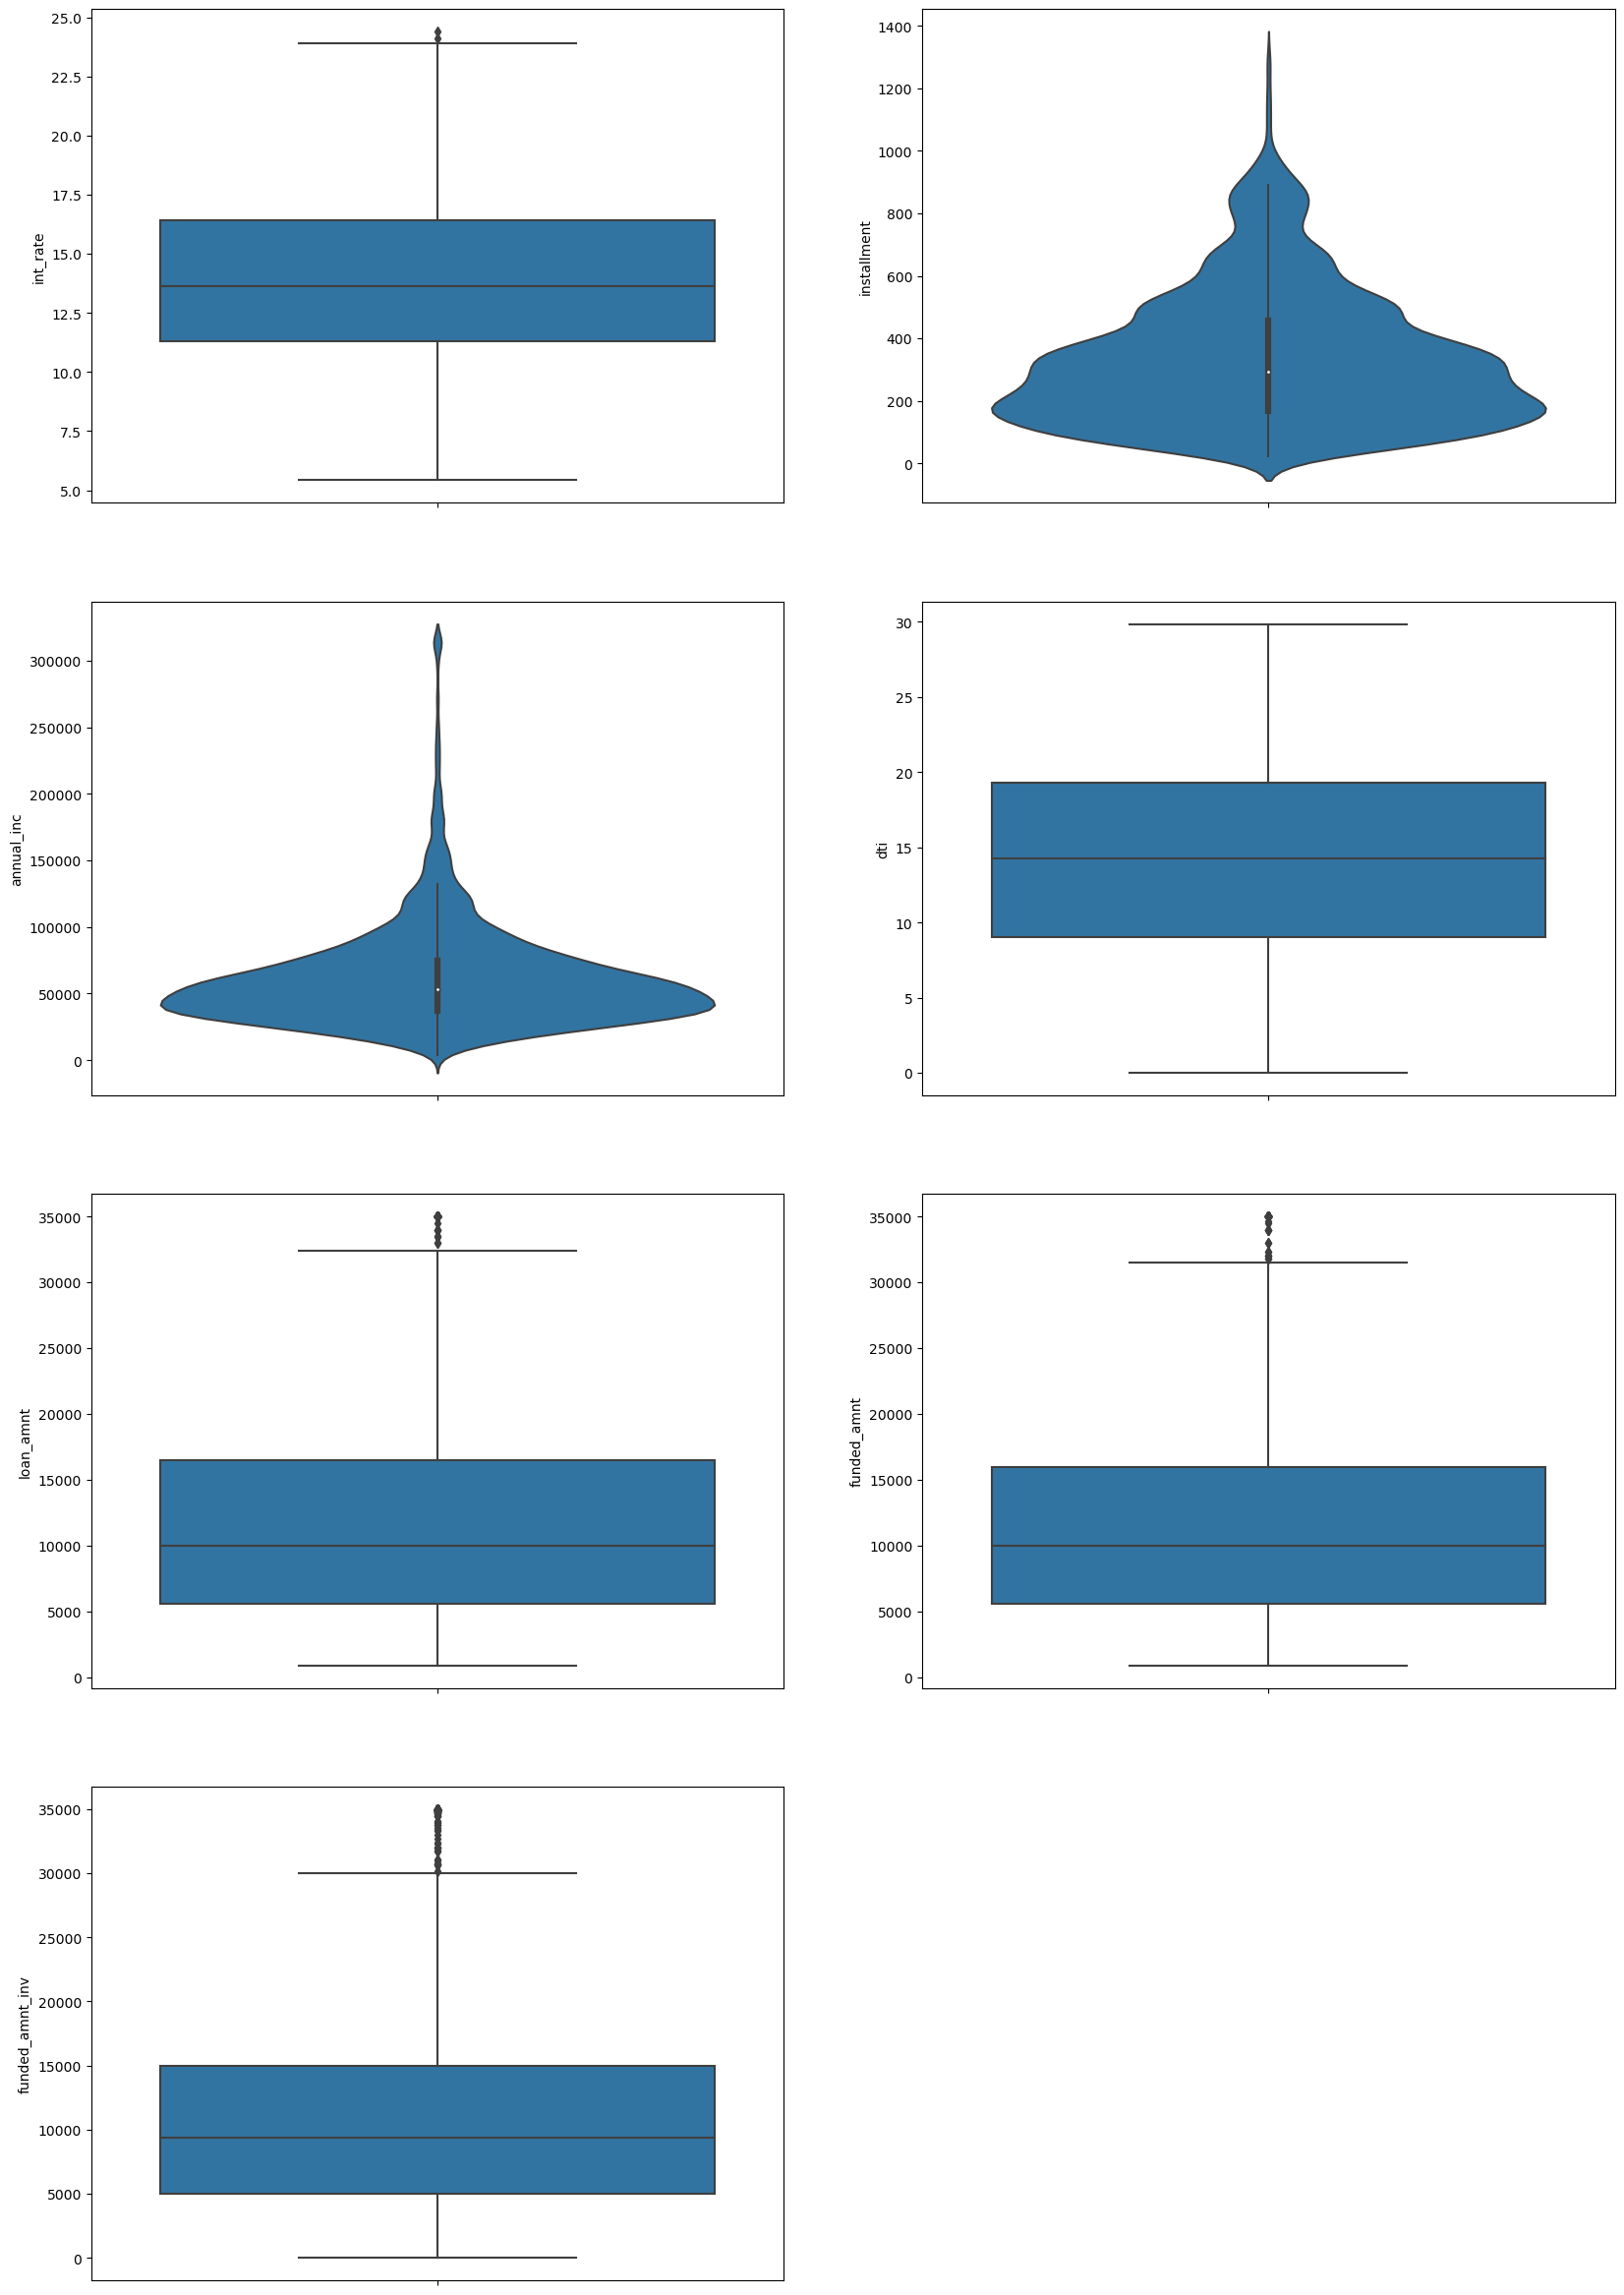

In [281]:
#plotting boxplot and violin plot to understand the distribution of quantitative variables 
plt.figure(figsize=(20, 30))
plt.subplot(4,2,1)
sns.boxplot( y = 'int_rate', data = df_loan_cleaned_defaulted)
plt.subplot(4,2,2)
sns.violinplot(y = 'installment', data = df_loan_cleaned_defaulted)
plt.subplot(4,2,3)
sns.violinplot(y = 'annual_inc', data = df_loan_cleaned_defaulted)
plt.subplot(4,2,4)
sns.boxplot(y = 'dti', data = df_loan_cleaned_defaulted)
plt.subplot(4,2,5)
sns.boxplot(y = 'loan_amnt', data = df_loan_cleaned_defaulted)
plt.subplot(4,2,6)
sns.boxplot(y = 'funded_amnt', data = df_loan_cleaned_defaulted)
plt.subplot(4,2,7)
sns.boxplot(y = 'funded_amnt_inv', data = df_loan_cleaned_defaulted)
plt.show()


<a id="5.4"></a>
### Inferences from quantitative variables bivariate analysis
1. Int_rate - most of the loans with interest rate between 11 to 16 % are defaulted
1. Installment - most of the defaulted loans have installements less than 1000 
1. Annual_inc - most of the defaulted loans have annual income less than 16000
1. Dti - most of the defaulted loans have dti between 9 to 20.
1. Loan_amnt - the loan amount of most of the defaulted loans is between 5000 to 16000
1. Funded_amnt - same behaviour as loan_amt
1. Funded_amnt_inv - same behaviour as loan_amt

<a id="6"></a>
## <font color = blue>Conclusion</font>
Below are the high level conclusions. for more details check inferences sections of different analysis.
- Loans take in the state of NE(Nebraska) has very high very high risk of getting defaulted.
- Loans with smaller amounts have high risk of getting defaulted.
- Loans given to the customer with history of bancrupcy have high chances of defaulting.